# Trabalho prático I - Aplicação de técnicas de agrupamento

Nesse trabalho aplicaremos técnicas de aprendizado não-supervisionado em dados do [Yelp](https://drive.google.com/file/d/1dYJFszSL_oSoBLRoZGZPBvgywVcvL1M0/view?usp=sharing) (Ver detalhes sobre o Yelp Challenge [aqui](https://www.yelp.com/dataset/challenge)).

O objetivo principal é encontrar distritos culinários na cidade de Las Vegas (Estados Unidos).
No contexto desse trabalho, distritos culinários são caracterizados por um conjunto de restaurantes que simultaneamente estão próximos (geograficamente) e são similares (com respeito à comida que servem).

O trabalho está dividido em duas partes. Em cada uma delas, vocês deverão utilizar uma parte diferente do conjunto de dados. Mais detalhes, nas seções a seguir.

Além disso, vocês deverão utilizar _Python_ e _Jupyter Notebooks_, de forma que todos os resultados estarão em um _notebook_ (este aqui que vocês estão lendo). Vocês estarão livres para escolher as bibliotecas que preferirem.

Sobre o trabalho:

**Grupo:** de até 3 pessoas. Mantenha em mente que 2 pessoas no mesmo grupo neste trabalho não poderão estar no mesmo grupo no trabalho 2. Pode haver repetição com relação aos grupos das listas.

**Data de entrega:** **23 de maio de 2018** (para ambas as partes) até às **18 horas**.

**Forma de entrega:** Vocês deverão enviar esse notebook (com código, resultados e discussões) para o e-mail do professor. É importante ressaltar que seu notebook tem que ser executável, i.e., resultados (gráficos, tabelas e números) devem ser gerados novamente ao executar o código do notebook a partir do conjunto de dados originais. **A Falha desse último ponto implicará em nota zero!**

**Versão do Python:** Python 2 ou Python 3. Apenas indiquem no início do trabalho qual foi escolhida.



## Parte I

No arquivo `yelp_academic_dataset_business.json` estão contidas informações sobre vários estabelecimentos comerciais do conjunto de dados do Yelp, incluindo várias cidades e tipos de estabelecimento que não temos interesse nesse trabalho. Em cada linha do arquivo há uma _string_ contendo um _json_ referente a cada estabelecimento.

Abaixo, uma exemplo de _json_. Veja que:
-  O atributo `city` identifica a cidade
-  O atributo `business_id` é um identificador único no conjunto de dados em todos os arquivos
-  Os atributos `latitude` e `longitude` estão disponíveis
-  O atributo `categories` caracteriza o ramo de atividade. Todos os restaurantes têm a categoria 'Restaurants' nesse atributo. Além disso, o tipo de culinária de cada restaurante é descrito nesse atributo.

In [1]:
import json
line = '{"city": "Las Vegas", "neighborhood": "Southeast", "name": "Flight Deck Bar & Grill", "business_id": "Pd52CjgyEU3Rb8co6QfTPw", "longitude": -115.1708484, "hours": {"Monday": "8:30-22:30", "Tuesday": "8:30-22:30", "Friday": "8:30-22:30", "Wednesday": "8:30-22:30", "Thursday": "8:30-22:30", "Sunday": "8:30-22:30", "Saturday": "8:30-22:30"}, "state": "NV", "postal_code": "89119", "categories": ["Nightlife", "Bars", "Barbeque", "Sports Bars", "American (New)", "Restaurants"], "stars": 4.0, "address": "6730 S Las Vegas Blvd", "latitude": 36.0669136, "review_count": 13, "attributes": {"Alcohol": "full_bar", "HasTV": true, "NoiseLevel": "average", "RestaurantsAttire": "casual", "BusinessAcceptsCreditCards": true, "Music": {"dj": false, "background_music": true, "no_music": false, "jukebox": false, "live": false, "video": false, "karaoke": false}, "Ambience": {"romantic": false, "intimate": false, "classy": false, "hipster": false, "divey": false, "touristy": false, "trendy": false, "upscale": false, "casual": true}, "RestaurantsGoodForGroups": true, "Caters": true, "WiFi": "free", "RestaurantsReservations": false, "BikeParking": true, "RestaurantsTakeOut": true, "GoodForKids": true, "HappyHour": true, "GoodForDancing": false, "RestaurantsTableService": true, "OutdoorSeating": false, "RestaurantsPriceRange2": 2, "RestaurantsDelivery": false, "BestNights": {"monday": false, "tuesday": false, "friday": false, "wednesday": true, "thursday": false, "sunday": false, "saturday": false}, "GoodForMeal": {"dessert": false, "latenight": false, "lunch": true, "dinner": false, "brunch": false, "breakfast": false}, "BusinessParking": {"garage": false, "street": false, "validated": false, "lot": true, "valet": false}, "CoatCheck": false, "Smoking": "no", "WheelchairAccessible": true}, "is_open": 1}'
print(json.dumps(json.loads(line), indent = 3))

{
   "city": "Las Vegas", 
   "neighborhood": "Southeast", 
   "name": "Flight Deck Bar & Grill", 
   "business_id": "Pd52CjgyEU3Rb8co6QfTPw", 
   "longitude": -115.1708484, 
   "hours": {
      "Monday": "8:30-22:30", 
      "Tuesday": "8:30-22:30", 
      "Friday": "8:30-22:30", 
      "Wednesday": "8:30-22:30", 
      "Thursday": "8:30-22:30", 
      "Sunday": "8:30-22:30", 
      "Saturday": "8:30-22:30"
   }, 
   "is_open": 1, 
   "state": "NV", 
   "postal_code": "89119", 
   "stars": 4.0, 
   "address": "6730 S Las Vegas Blvd", 
   "latitude": 36.0669136, 
   "review_count": 13, 
   "attributes": {
      "Alcohol": "full_bar", 
      "HasTV": true, 
      "NoiseLevel": "average", 
      "RestaurantsAttire": "casual", 
      "BusinessAcceptsCreditCards": true, 
      "Music": {
         "dj": false, 
         "background_music": true, 
         "no_music": false, 
         "karaoke": false, 
         "live": false, 
         "video": false, 
         "jukebox": false
      }, 
  

A partir dos dados descritos, você deve encontrar distritos culinários em Las Vegas. Encontre grupos considerando que a similaridade entre restaurantes pode ser inferida pelo atributo `categories` e a proximidade através dos atributos `latitude` e `longitude`.

**a)** Proponha uma representação apropriada para os dados. Justifique sua escolha

**b)** Utilize técnicas de agrupamento para encontrar distritos culinários. É obrigatório o uso de pelo menos quatro técnicas:
-  k-means
-  Agrupamento hierárquico
-  GMM (Gaussian Mixture Model)
-  Agrupamento Espectral

**Sugestão:** Todas já estão implementadas na biblioteca _sklearn_

**c)** Apresente uma justificativa plausível para o número de grupos utilzado no item anterior

**d)** Apresente o `dendrograma` para o resultado do agrupamento hierárquico

**e)** Baseado no conteúdo de cada grupo, proponha uma forma sistemática de encontrar _rótulos_ para cada grupo. Veja que se dois grupos forem identificado pelo mesmo rótulo há um problema (com o resultado de seu agrupamento ou com sua forma de rotular grupos)

**f)** Faça um gráfico para cada agrupamento obtido da seguinte forma:
-  cada restaurante será um ponto no plano de acordo com suas coordenadas geográficas
-  a cor de cada ponto será diferente para grupos diferentes
-  cada grupo deve ser identificado com seu respectivo rótulo encontrado no item anterior (e.g., através de uma legenda de cor)

**g)** Comente os resultados. Comente também as diferenças de cada agrupamento

**Observação:** sua criatividade para gerar visualizações informativas e de qualidade será parte da avaliação.


## Resolução da parte I

### Inclusões de biblioteca

In [2]:
import json
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (25, 16)
plt.rcParams['font.size'] = 24.0

### Leitura e representação dos dados

A leitura dos dados foi feita da maneira em que, na nossa opinião, daria mais legibilidade ao código.  
  
Os dados estão sendo representados por uma matriz onde:
* **Colunas**: Todas as categorias existentes (exceto "Restaurants"), onde cada categoria é um atributo binário, onde 1 indica que o restaurante pertence à categoria e 0 caso contrário, e dois valores ponto flutuante, que são a latitude e longitude
* **Linhas**: Cada restaurante de Las Vegas existente na base de dados
  
Escolhemos utilizar o DataFrame do pandas, e exportamos os dados já montados para o arquivo "/data/data_pt1.csv", o qual iremos utilizar para os outros itens da primeira parte.

In [2]:
input_file = open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json", "r")

data = []
attributes = ['latitude', 'longitude']
data_dict = {}

for line in input_file:
    restaurant = json.loads(line)
    if "Restaurants" in restaurant["categories"] and restaurant["city"] == "Las Vegas":
        data.append(restaurant)
        
input_file.close()

count_categories = {}

for restaurant in data:
    for category in restaurant["categories"]:
        if not(category in attributes) and category != "Restaurants":
            attributes.append(category)
            count_categories[category] = 1
        elif category != "Restaurants":
            count_categories[category] += 1

for attr in attributes:
    data_dict[attr] = []
    for restaurant in data:
        if attr == "latitude" or attr == "longitude":
            data_dict[attr].append(restaurant[attr])
        elif attr != "Restaurants" and attr in restaurant["categories"]:
            data_dict[attr].append(1)
        else:
            data_dict[attr].append(0)
            
df = pd.DataFrame(data_dict)
df.to_csv("data/data_pt1.csv", index=False)

data = pd.read_csv("data/data_pt1.csv")
data.info(verbose=False, memory_usage=False)

for column in data:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658 entries, 0 to 4657
Columns: 163 entries, Active Life to longitude
dtypes: float64(2), int64(161)

### PCA (Principal Components Analysis)

Na base de dados, existem 163 atributos. Utilizaremos PCA para comparar (**ESCREVER JUSTIFICATIVA PCA**)

In [19]:
centralized_data = data - data.mean()
pca = PCA(n_components=len(df.columns))
data_pca = pca.fit_transform(centralized_data)

df_pca = pd.DataFrame(data_pca)

df_pca = df_pca.drop([column for column in range(47, len(df_pca.columns))], axis=1)
    
'''
with plt.style.context('seaborn-whitegrid'):
    plt.rcParams["figure.figsize"] = (40, 25)
    plt.rcParams['font.size'] = 20.0

    plt.bar(range(1, len(df.columns) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')

    variance = pca.explained_variance_ratio_
    for i, j in enumerate(variance):
        variance[i] = sum(variance[i - 1:i + 1]) if i > 0 else variance[i]

    plt.step(range(1, len(df.columns) + 1), variance, where='mid', label='cumulative explained variance')

    plt.xticks(range(1, len(df.columns)))
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title('Variance explained with PCA')
    plt.tight_layout()

variance[47]
'''

'\nwith plt.style.context(\'seaborn-whitegrid\'):\n    plt.rcParams["figure.figsize"] = (40, 25)\n    plt.rcParams[\'font.size\'] = 20.0\n\n    plt.bar(range(1, len(df.columns) + 1), pca.explained_variance_ratio_, alpha=0.5, align=\'center\', label=\'individual explained variance\')\n\n    variance = pca.explained_variance_ratio_\n    for i, j in enumerate(variance):\n        variance[i] = sum(variance[i - 1:i + 1]) if i > 0 else variance[i]\n\n    plt.step(range(1, len(df.columns) + 1), variance, where=\'mid\', label=\'cumulative explained variance\')\n\n    plt.xticks(range(1, len(df.columns)))\n    plt.ylabel(\'Explained variance ratio\')\n    plt.xlabel(\'Principal components\')\n    plt.legend(loc=\'best\')\n    plt.title(\'Variance explained with PCA\')\n    plt.tight_layout()\n\nvariance[47]\n'

## Escolha dos possíveis valores de $k$ com inércia

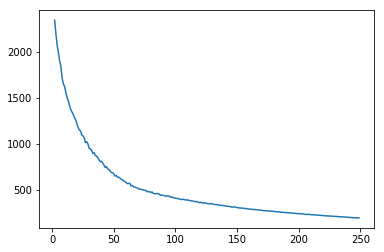

In [21]:
inertia = []

# Normalização dos dados
for column in df_pca:
    df_pca[column] = (df_pca[column] - df_pca[column].min()) / (df_pca[column].max() - df_pca[column].min())
    
for k in range(2, 250):
    km = KMeans(n_clusters=k, n_jobs=-1)
    labels = km.fit_predict(df_pca)
    inertia.append(km.inertia_)
    
plt.plot(range(2, 250), inertia)

## Aplicação dos algoritmos de agrupamento para $k$ com valores entre 26 a 35

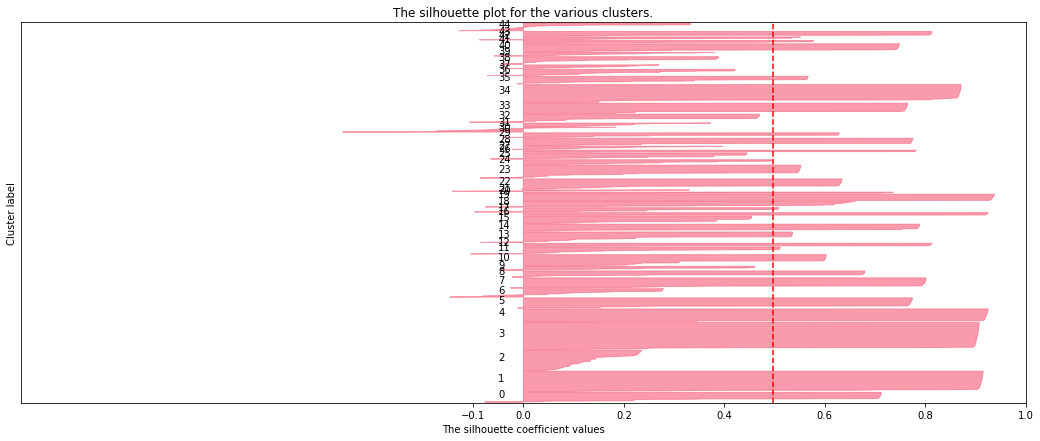

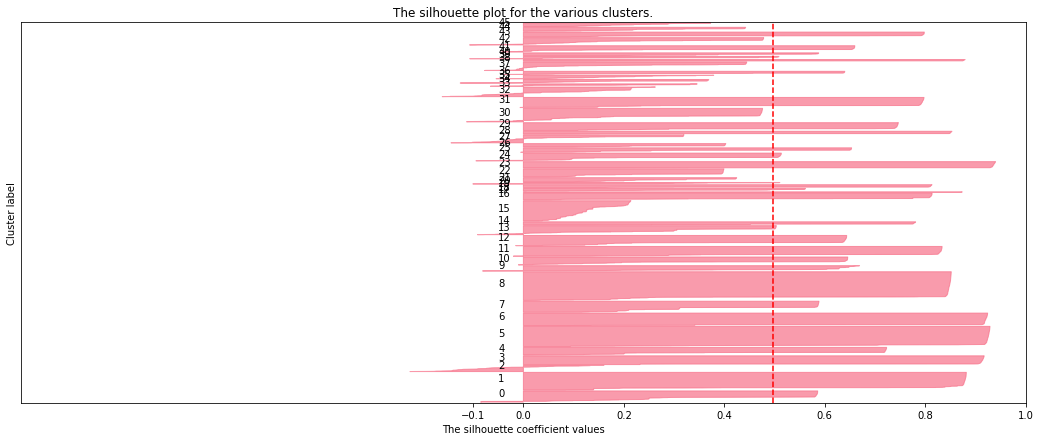

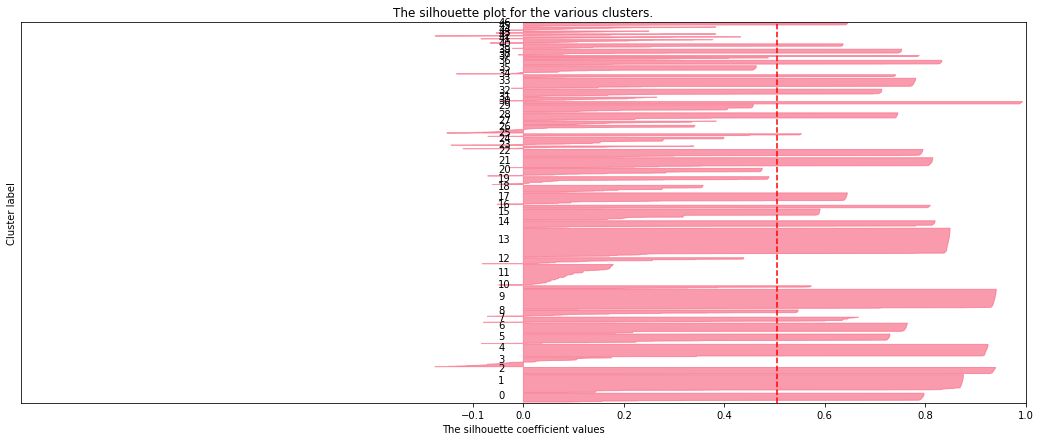

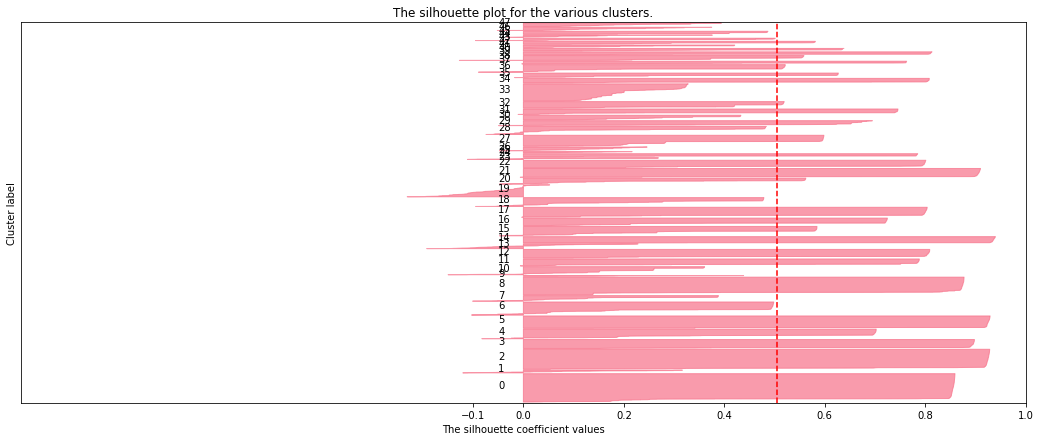

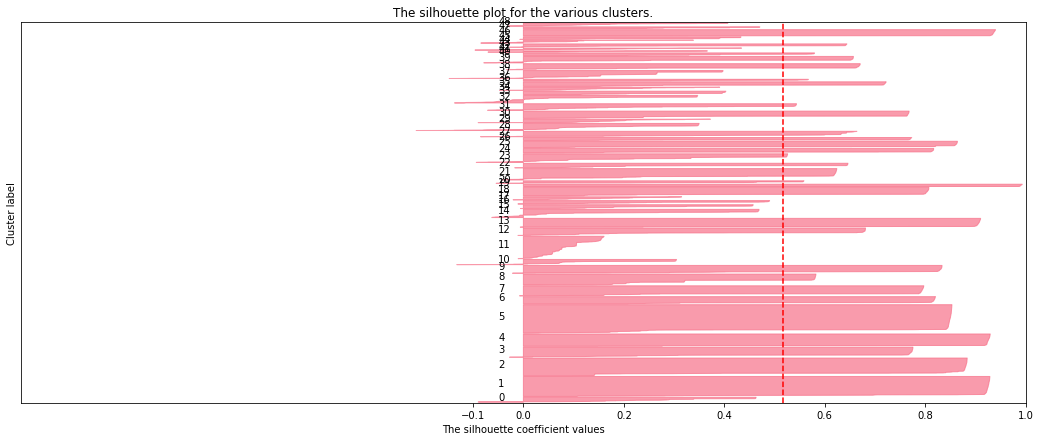

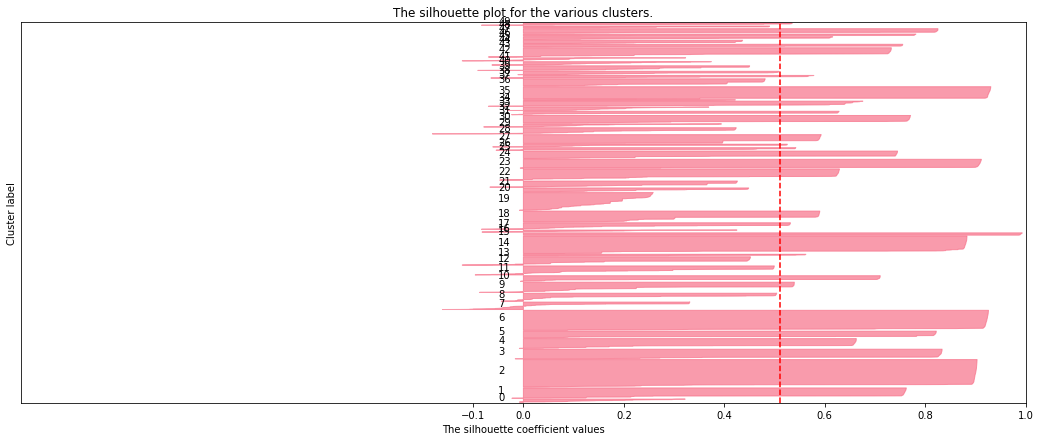

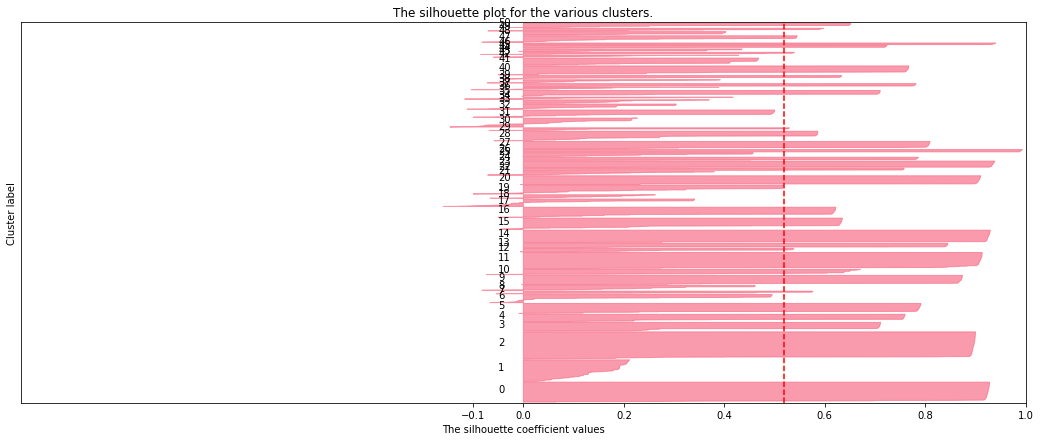

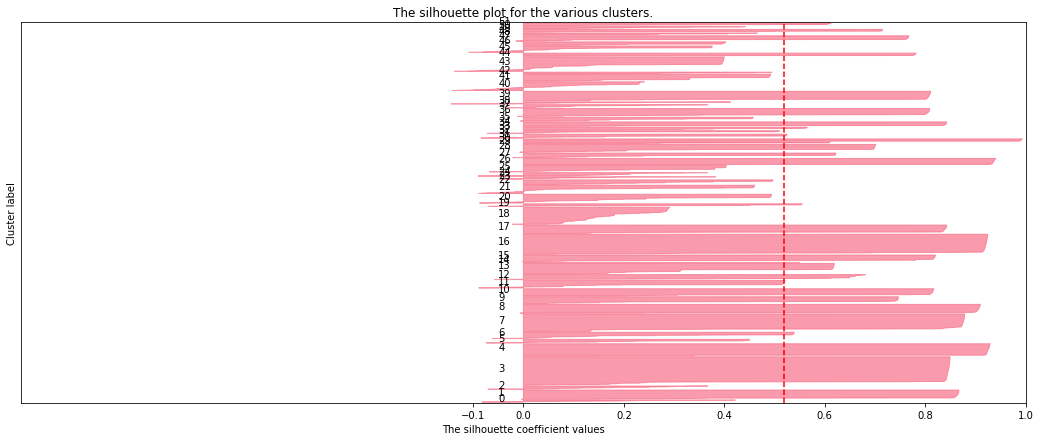

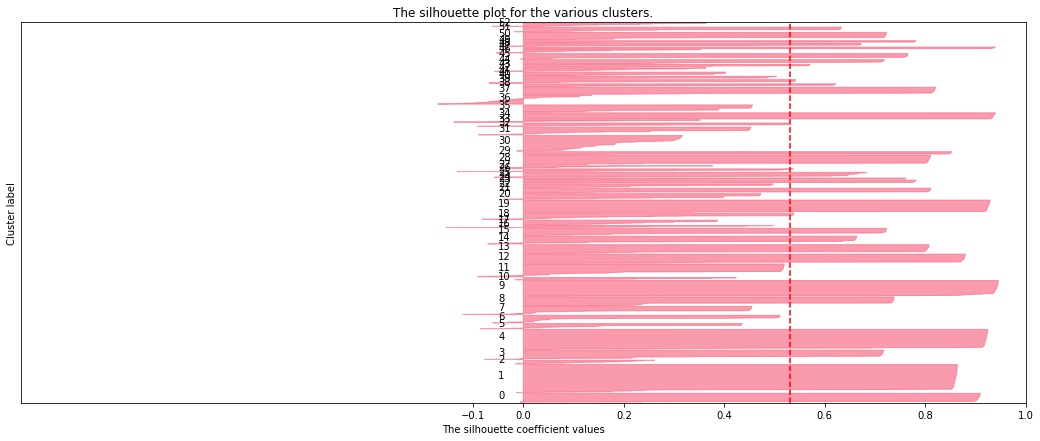

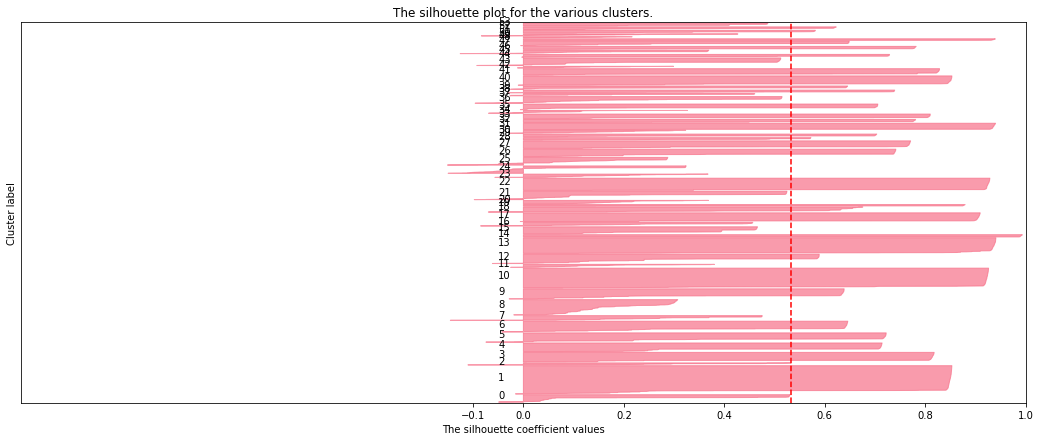

In [31]:
range_n_clusters = [x for x in range(45, 55)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = (sns.color_palette("husl", n_clusters))
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

## Parte II

O objetivo dessa parte é o mesmo da Parte I (de **(a)** a **(f)**). Mas agora, vocês não poderão utilizar o atributo `categories`. Vocês deverão "inferir as categorias" de cada restaurante a partir de seus respectivos _reviews_ no Yelp.
O arquivo `yelp_academic_dataset_review.json` contém uma coleção de _reviews_, novamente, cada linha (_review_) é um _json_, como o do exemplo abaixo.

Através do atributo `business_id` você pode identificar todos os _reviews_ 
de cada restaurante em Las Vegas. Além desse atributo, necessita-se apenas do atributo `text`, i.e., o conteúdo do _review_.




In [2]:
import json
line = '{"funny": 0, "user_id": "bv2nCi5Qv5vroFiqKGopiw", "review_id": "n6QzIUObkYshz4dz2QRJTw", "text": "Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \\n\\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \\n\\nA bit outside of downtown montreal but take the metro out and it\'s less than a 10 minute walk from the station.", "business_id": "VR6GpWIda3SfvPC-lg9H3w", "stars": 5, "date": "2016-05-28", "useful": 0, "cool": 0}'
print(json.dumps(json.loads(line), indent = 3))

{
   "funny": 0,
   "user_id": "bv2nCi5Qv5vroFiqKGopiw",
   "review_id": "n6QzIUObkYshz4dz2QRJTw",
   "text": "Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \n\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \n\nA bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station.",
   "business_id": "VR6GpWIda3SfvPC-lg9H3w",
   "stars": 5,
   "date": "2016-05-28",
   "useful": 0,
   "cool": 0
}


In [39]:
data = pd.read_csv("data/data_pt2_names.csv")
coordinates = pd.read_csv("data/data_pt2_coordinates.csv")
data["latitude"] = coordinates["latitude"]
data["longitude"] = coordinates["longitude"]

def silhouette_analysis(data_analysis, n_clusters, method="k-means"):
    if method == "k-means":
        clusterer = KMeans(n_clusters=n_clusters, n_jobs=-1)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "agrupamento hiérarquico":
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "GMM":
        clusterer = GaussianMixture(n_components=n_clusters).fit(data_analysis)
        cluster_labels = clusterer.predict(data_analysis)
    else:
        clusterer = SpectralClustering(n_clusters=n_clusters, n_jobs=-1)
        cluster_labels = clusterer.fit_predict(data_analysis)
        
    data_with_labels = data.copy()
    data_with_labels.insert(len(data_with_labels.columns), "cluster_label", cluster_labels)

    all_categories = []
    for i in range(n_clusters):
        data_in_label = data_with_labels[data_with_labels.cluster_label == i]
        data_in_cluster = data_in_label.drop(
            ["latitude", "longitude", "cluster_label"], axis=1)
        data_out_label = data_with_labels[data_with_labels.cluster_label != i]
        data_out_cluster = data_out_label.drop(
            ["latitude", "longitude", "cluster_label"], axis=1)
        data_cluster = data_in_cluster.mean() - 1.5*data_out_cluster.mean()
        
        all_categories.append(
            data_cluster.sort_values(ascending=False)[1:20])
    
    print(all_categories)
    
#     # Verifica se existe trios de categorias repetidos
#     for i in range(len(all_categories)):
#         for j in range(i + 1, len(all_categories)):
#             if all_categories[i].index[0] in all_categories[j].index and all_categories[i].index[1] in all_categories[j].index \
#                     and all_categories[i].index[2] in all_categories[j].index:
#                 print("\nCategorias repetidas para n_clusters = ", n_clusters)
#                 print("Cluster ", i, " e Cluster ", j)
#                 for category in all_categories[i].index:
#                     print(category, end=" ")
#                 print()
#                 for category in all_categories[j].index:
#                     print(category, end=" ")
#                 print("\n")

    sns.set()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_analysis) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(data_analysis, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(
        data_analysis, cluster_labels)

    y_lower = 10

    colors_vec = ["#e6194b", "#3cb44b", "#ffe119", "#0082c8",
                  "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#fabebe", "#008080",
                  "#e6beff", "#800000", "#000080", "#000000", "#d2f53c", "#808080"]

    color = sns.color_palette(colors_vec)
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color[i], edgecolor=color[i], alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = [color[i] for i in cluster_labels]
    ax2.scatter(data["latitude"].as_matrix(), data["longitude"].as_matrix(),
                marker='o', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Latitude")
    ax2.set_ylabel("Longitude")

    plt.suptitle(("Silhouette analysis for " + method + " clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    00  000  00am  00pm   01   02  020   03   04   05    ...      über  でしたが  \
0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...       0.0   0.0   
1  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...       0.0   0.0   
2  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...       0.0   0.0   
3  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...       0.0   0.0   
4  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...       0.0   0.0   

   ガーリックブレッドを食べてみました  スパゲッティ  スパゲッティの味は  モールに行った際に   残念  \
0                0.0     0.0        0.0        0.0  0.0   
1                0.0     0.0        0.0        0.0  0.0   
2                0.0     0.0        0.0        0.0  0.0   
3                0.0     0.0        0.0        0.0  0.0   
4                0.0     0.0        0.0        0.0  0.0   

   焼きたてのガーリックブレッドは大変美味しかったです  latitude  longitude  
0                        0.0  0.625204   0.132460  
1                        0.0  0.635982   0.443965  
2       

# Leitura dos arquivos business e reviews 

É feita a criação de um novo arquivo csv data_pt2 onde cada business_id tem todas suas reviews e coordenadas associadas a ele

In [2]:
# code for part II starts here
input_file = open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json", "r")

ids = {}
ids["business_id"] = []
ids["latitude"] = []
ids["longitude"] = []
attributes = ['latitude', 'longitude']
data_p2_dict = {}

for line in input_file:
    restaurant = json.loads(line)
    if "Restaurants" in restaurant["categories"] and restaurant["city"] == "Las Vegas":
        ids["business_id"].append(restaurant["business_id"])
        ids["latitude"].append(restaurant["latitude"])
        ids["longitude"].append(restaurant["longitude"])
        
input_file.close();
        
input_file = open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json", "r")

data_p2_dict["business_id"] = []
data_p2_dict["text"] = []
data_p2_dict["latitude"] = []
data_p2_dict["longitude"] = []

for line in input_file:
    restaurant = json.loads(line)
    if (restaurant["business_id"] in ids["business_id"]):
        index = ids["business_id"].index(restaurant["business_id"])
        if(restaurant["business_id"] in data_p2_dict["business_id"]):
            index_dict = data_p2_dict["business_id"].index(restaurant["business_id"])
            data_p2_dict["text"][index_dict].append(restaurant["text"])
        else:
            data_p2_dict["business_id"].append(restaurant["business_id"])
            data_p2_dict["text"].append([restaurant["text"]])
            data_p2_dict["latitude"].append(ids["latitude"][index])
            data_p2_dict["longitude"].append(ids["longitude"][index])
        
input_file.close()
            
df_p2 = pd.DataFrame(data_p2_dict)
df_p2.to_csv("data/data_pt2.csv", index=False)

# data_p2 = pd.read_csv("data/data_pt2.csv")
df_p2.info(verbose=False, memory_usage=False)

# for column in data:
#     data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658 entries, 0 to 4657
Columns: 4 entries, business_id to text
dtypes: float64(2), object(2)

# Cálculo do TF-IDF

É feito o cálculo do TF-IDF de cada business_id em relação às suas reviews. Para cada termo encontrado, o TfidfVectorizer retorna uma matriz 1xN, onde N é a quantidade de reviews que o business_id em questão tem. Como precisamos de um único valor para cada termo, é feita uma média aritmética com os valores dessa matriz.
Depois disso, é feita uma matriz contendo os scores TF-IDF de cada business_id para cada um dos termos encontrados que é salva no arquivo csv data_pt2_names. 

In [4]:
df_p2 = pd.read_csv("data/data_pt2.csv")
# df_p2.info(verbose=False, memory_usage=False)
terms_list = []
feature_names = set()
# vectorizer = TfidfVectorizer()
# tfidf = vectorizer.fit_transform(df_p2["text"])
for reviews in df_p2["text"]:    
    vectorizer = TfidfVectorizer(min_df=0.2, norm = "l2", use_idf = "true")
    tfidf = vectorizer.fit_transform(reviews)
    feature_names.update(vectorizer.get_feature_names())
    idf = vectorizer.idf_
    scores = []
    for i in range(0,tfidf.shape[1]):
        scores.append((sum(tfidf[:,i].toarray())/len(tfidf[:,i].toarray()))[0])
    terms_list.append(dict(zip(vectorizer.get_feature_names(), scores)))
    
feature_names = list(feature_names)
feature_names.sort()


latitudes = df_p2["latitude"]
longitudes = df_p2["longitude"]

for column in latitudes:
    latitudes = (latitudes - latitudes.min()) / (latitudes.max() - latitudes.min())
    
for column in longitudes:
    longitudes = (longitudes - longitudes.min()) / (longitudes.max() - longitudes.min())

content = {}
for name in feature_names:
    content[name] = []
    for item in terms_list:
        if name in item:
            content[name].append(item[name])
        else:
            content[name].append(0)

data_names = pd.DataFrame(content)
data_names.to_csv("data/data_pt2_names.csv", index=False)
    

In [23]:
coordinates = pd.DataFrame()
coordinates["latitude"] = latitudes
coordinates["longitude"] = longitudes
coordinates.to_csv("data/data_pt2_coordinates.csv", index=False)

# Cálculo do PCA sobre a matriz de TF-IDF

Como foram encontrados mais de 13 mil termos, é feito um PCA para reduzir a dimensionalidade da matriz

In [5]:
data_names = pd.read_csv("data/data_pt2_names.csv")
centralized_data_names = data_names - data_names.mean()
pca = PCA(n_components=len(feature_names))
data_names_pca = pca.fit_transform(centralized_data_names)
names_variance = pca.explained_variance_ratio_ 

df_pca_names = pd.DataFrame(data_names_pca)

df_pca_names.to_csv("data/data_pt2_names_pca.csv", index=False)


# Calculando número de componentes para capturar a porcentagem desejada da variância

In [27]:
soma = 0
j = 0
per_variancia = 0.9
for i in range(0,len(names_variance)):
    soma = soma + names_variance[i]
    if(soma >= per_variancia):
        j = i
        break
print('Número de dimensões necessárias para capturar ', str(per_variancia*100), '% da variância: ', str(j))

Número de dimensões necessárias para capturar  90.0 % da variância:  524


In [4]:
df_pca_names = pd.read_csv("data/data_pt2_names_pca.csv")
df_pca_names.drop(df_pca_names.columns[524:],axis = 1, inplace = True)

coordinates = pd.read_csv("data/data_pt2_coordinates.csv")
df_pca_names["latitude"] = coordinates["latitude"]
df_pca_names["longitude"] = coordinates["longitude"]

[drive        0.006134
thru         0.005412
said         0.003767
taco         0.003740
tacos        0.003456
awesome      0.002786
usually      0.002759
give         0.002657
tamales      0.002624
minutes      0.002536
customer     0.002461
never        0.002416
mexican      0.002389
employees    0.002178
nellis       0.002045
manager      0.001896
clean        0.001894
pupusas      0.001871
cool         0.001803
dtype: float64, always      0.001445
asada       0.001434
carne       0.001082
catfish     0.000996
has         0.000918
drive       0.000871
orders      0.000805
her         0.000777
gone        0.000698
week        0.000693
salsas      0.000684
manager     0.000663
never       0.000653
bagels      0.000632
ready       0.000628
tomatoes    0.000613
going       0.000607
lake        0.000606
store       0.000605
dtype: float64, soup          0.003955
pork          0.003950
dishes        0.003497
beef          0.003329
chinese       0.003142
spicy         0.002854
korean      

For n_clusters = 11 The average silhouette_score is : 0.14132410734056167
[clean         0.002320
times         0.002181
said          0.001807
them          0.001649
any           0.001626
called        0.001576
station       0.001576
drive         0.001490
bartenders    0.001436
rude          0.001420
boulder       0.001299
employees     0.001250
taco          0.001219
home          0.001206
yummy         0.001189
say           0.001139
always        0.001125
used          0.001118
customer      0.001107
dtype: float64, summerlin    0.002255
red          0.002243
happy        0.002079
hour         0.001836
wine         0.001453
server       0.001404
suncoast     0.001188
casino       0.001065
tivoli       0.000913
golf         0.000860
vons         0.000811
avocado      0.000781
patio        0.000673
oysters      0.000626
round        0.000596
rocco        0.000568
juices       0.000551
juice        0.000540
tapas        0.000529
dtype: float64, drive         0.001804
always        0

For n_clusters = 13 The average silhouette_score is : 0.13003676159538902
[always       0.005818
thru         0.004584
said         0.003325
taco         0.003069
customer     0.002941
employees    0.002501
clean        0.002387
fast         0.002335
then         0.002279
minutes      0.002098
manager      0.002068
usually      0.002015
tamales      0.002014
any          0.002002
awesome      0.001954
tacos        0.001923
times        0.001862
through      0.001843
town         0.001841
dtype: float64, pho           0.005807
chinese       0.005619
pork          0.005125
beef          0.004507
dishes        0.004425
noodle        0.003788
spicy         0.003689
noodles       0.003497
ramen         0.003428
come          0.003346
korean        0.003259
broth         0.002752
restaurant    0.002577
vietnamese    0.002379
rice          0.002294
japanese      0.002111
dish          0.001946
dim           0.001865
sum           0.001851
dtype: float64, our          0.010202
strip        0.0

For n_clusters = 15 The average silhouette_score is : 0.11995850636693575


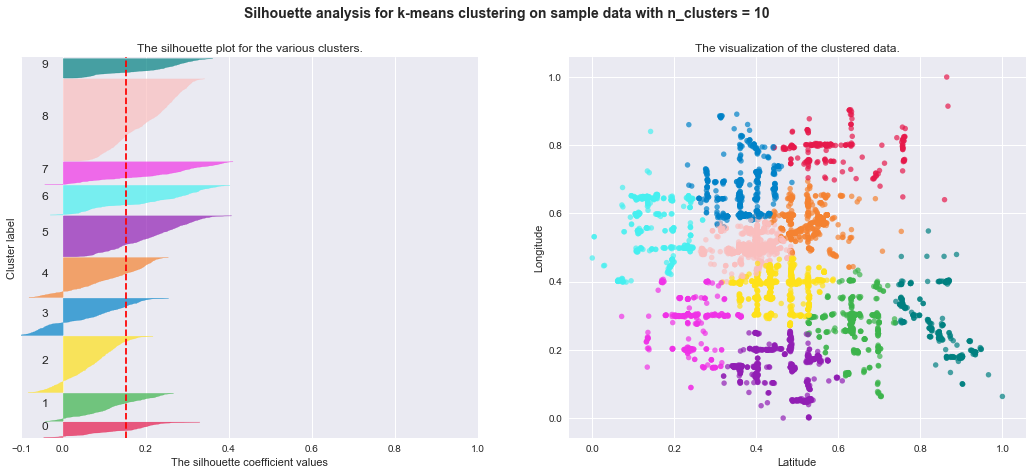

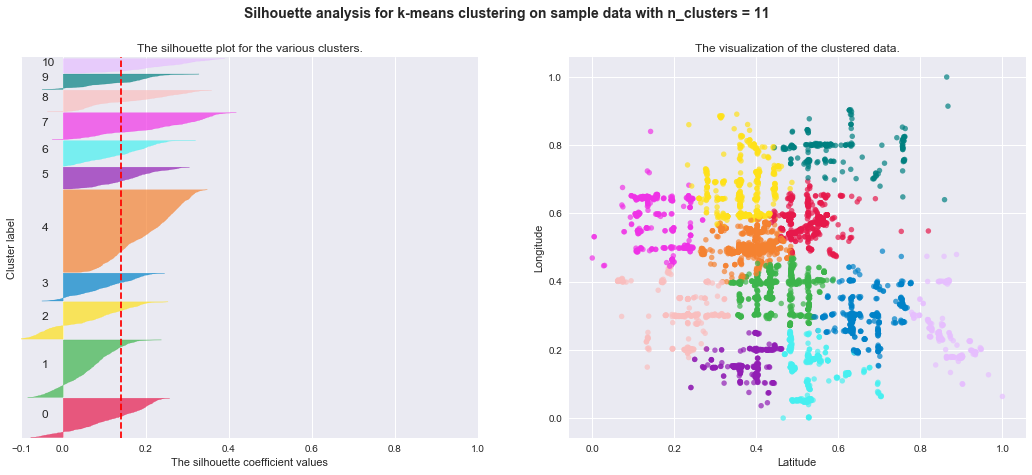

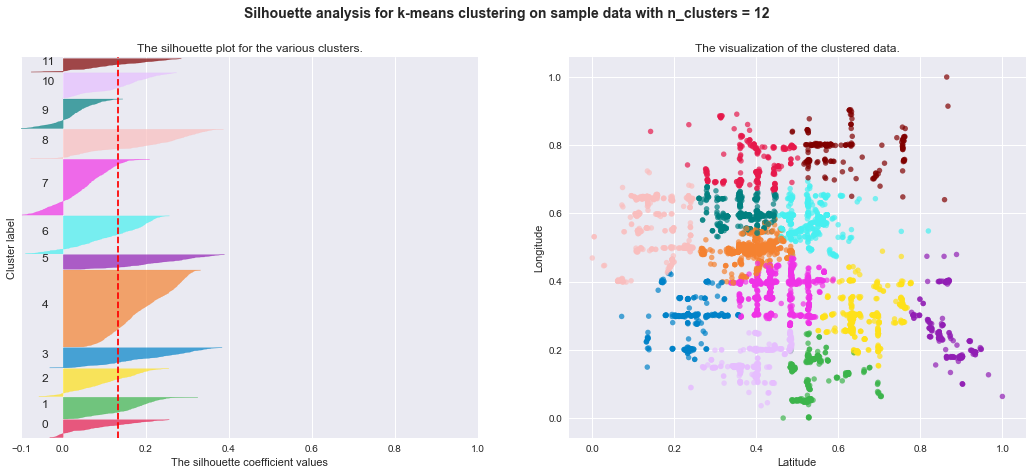

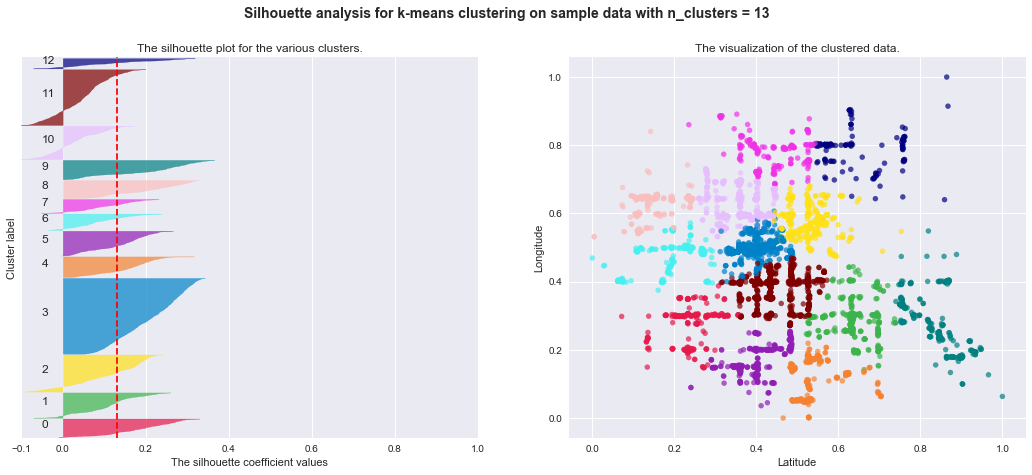

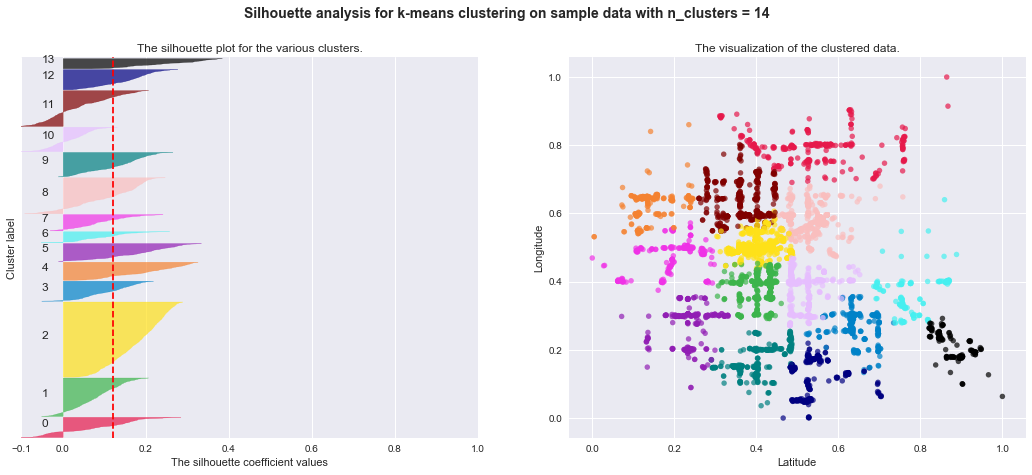

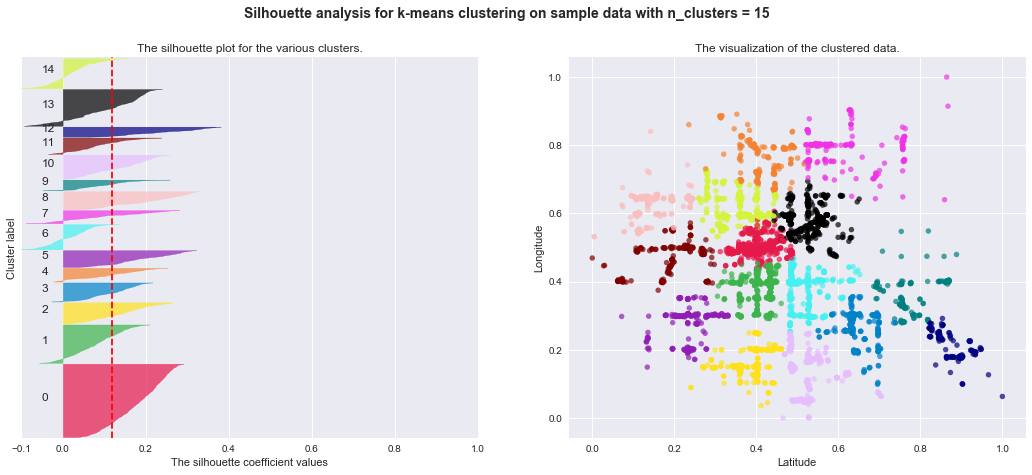

In [40]:
data_kmeans = df_pca_names.copy()
data_kmeans["latitude"] *= 2
data_kmeans["longitude"] *= 2
silhouette_analysis(data_kmeans, 10)
silhouette_analysis(data_kmeans, 11)
silhouette_analysis(data_kmeans, 12)
silhouette_analysis(data_kmeans, 13)
silhouette_analysis(data_kmeans, 14)
silhouette_analysis(data_kmeans, 15)


Categorias repetidas para n_clusters =  10
Cluster  1  e Cluster  7
Mexican Pizza Sandwiches 
Pizza Sandwiches Mexican 


Categorias repetidas para n_clusters =  10
Cluster  1  e Cluster  9
Mexican Pizza Sandwiches 
Pizza Sandwiches Mexican 


Categorias repetidas para n_clusters =  10
Cluster  7  e Cluster  9
Pizza Sandwiches Mexican 
Pizza Sandwiches Mexican 

For n_clusters = 10 The average silhouette_score is : 0.13173392301829095

Categorias repetidas para n_clusters =  11
Cluster  0  e Cluster  7
Mexican Pizza Sandwiches 
Pizza Sandwiches Mexican 


Categorias repetidas para n_clusters =  11
Cluster  0  e Cluster  9
Mexican Pizza Sandwiches 
Pizza Sandwiches Mexican 


Categorias repetidas para n_clusters =  11
Cluster  7  e Cluster  9
Pizza Sandwiches Mexican 
Pizza Sandwiches Mexican 

For n_clusters = 11 The average silhouette_score is : 0.12446818395799054

Categorias repetidas para n_clusters =  12
Cluster  7  e Cluster  9
Pizza Sandwiches Mexican 
Pizza Sandwiches Mexican 

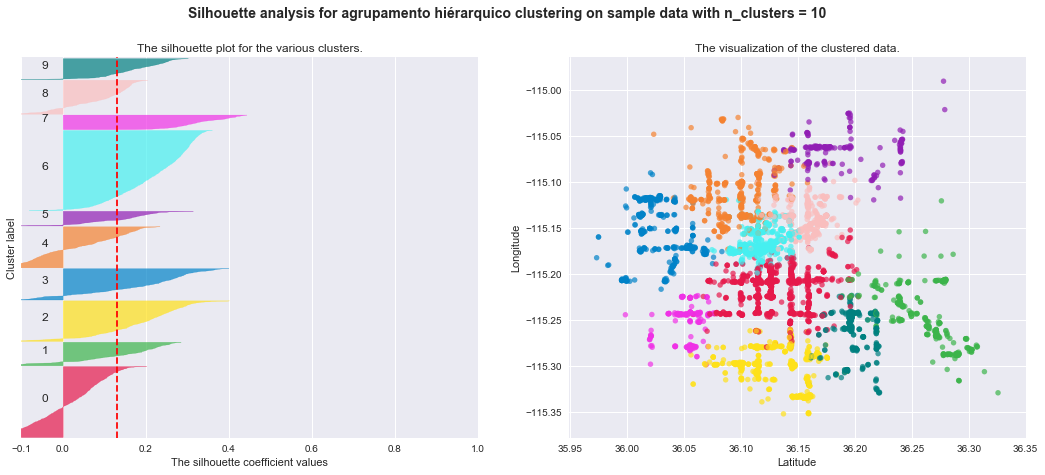

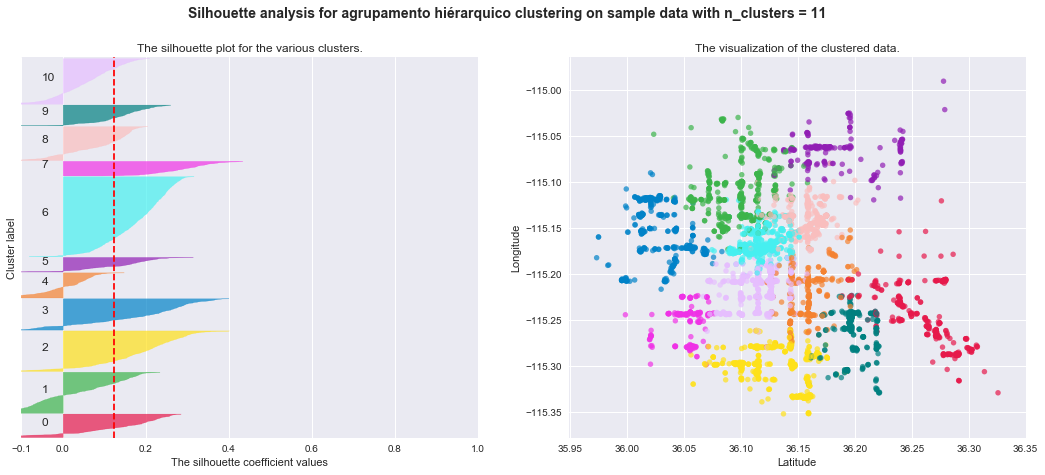

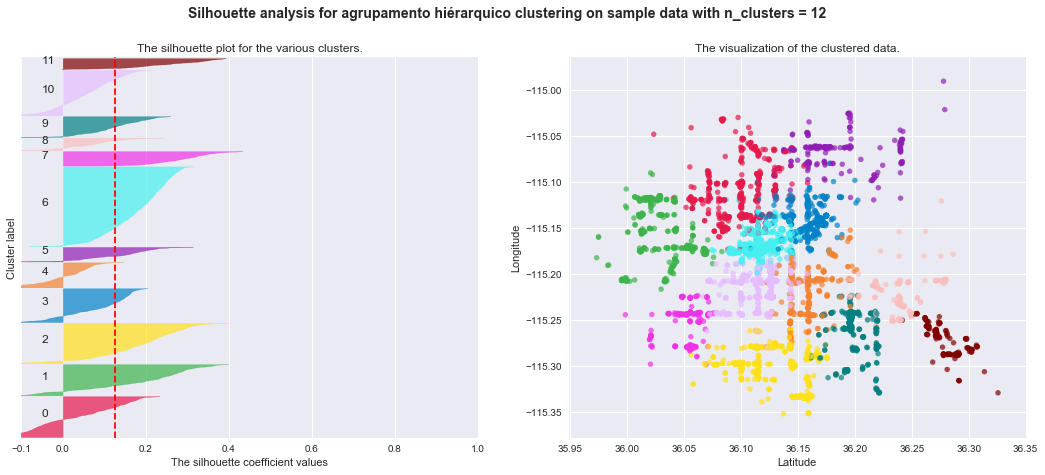

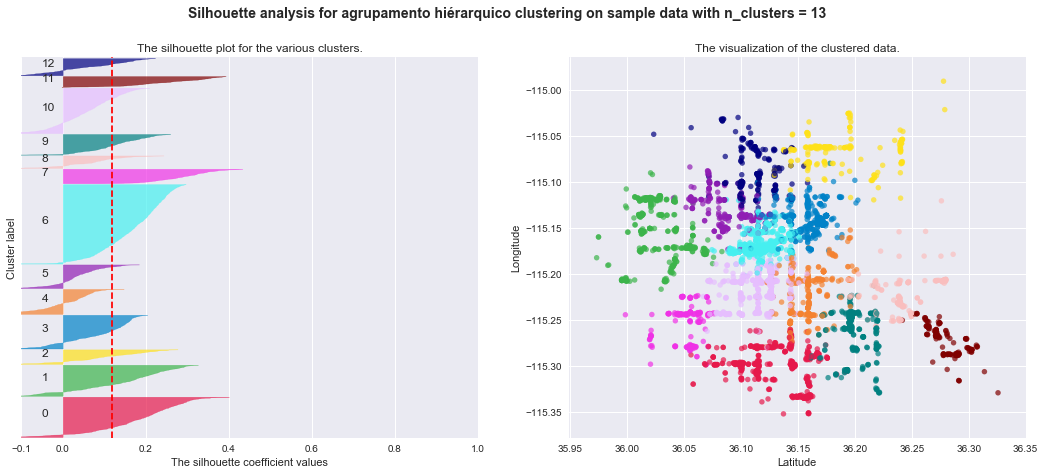

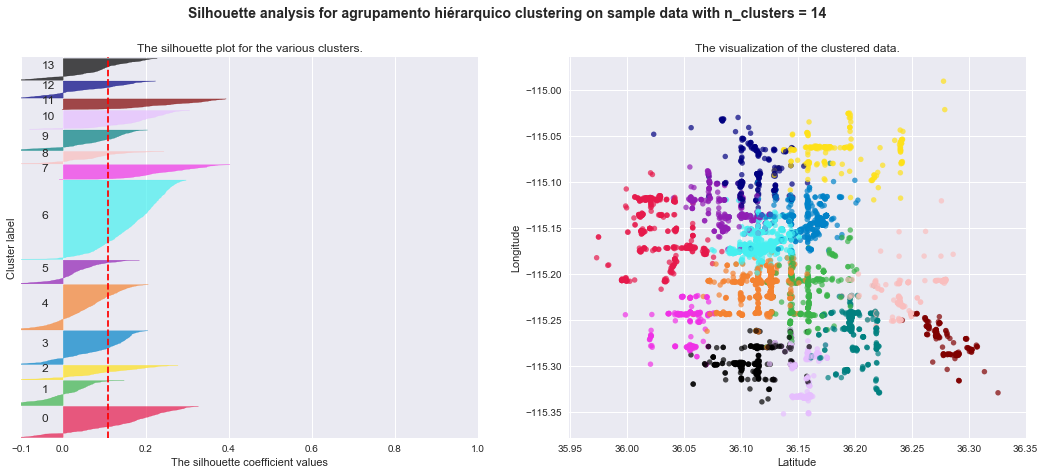

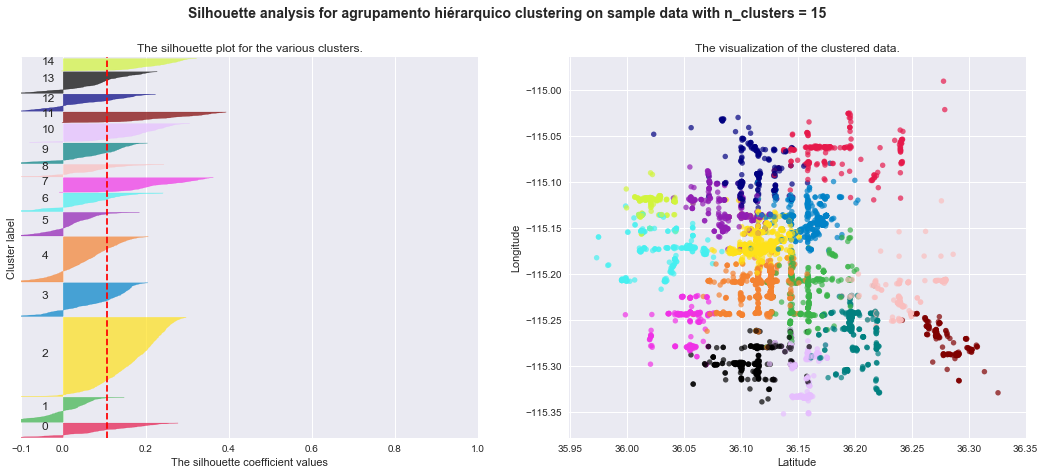

In [13]:
data_hierarchical = df_pca_names.copy()
data_hierarchical["latitude"] *= 2
data_hierarchical["longitude"] *= 2
silhouette_analysis(data_hierarchical, 10,"agrupamento hiérarquico")
silhouette_analysis(data_hierarchical, 11,"agrupamento hiérarquico")
silhouette_analysis(data_hierarchical, 12,"agrupamento hiérarquico")
silhouette_analysis(data_hierarchical, 13,"agrupamento hiérarquico")
silhouette_analysis(data_hierarchical, 14,"agrupamento hiérarquico")
silhouette_analysis(data_hierarchical, 15,"agrupamento hiérarquico")


Categorias repetidas para n_clusters =  10
Cluster  0  e Cluster  3
Mexican Pizza Sandwiches 
Sandwiches Mexican Pizza 


Categorias repetidas para n_clusters =  10
Cluster  0  e Cluster  9
Mexican Pizza Sandwiches 
Pizza Mexican Sandwiches 


Categorias repetidas para n_clusters =  10
Cluster  3  e Cluster  9
Sandwiches Mexican Pizza 
Pizza Mexican Sandwiches 

For n_clusters = 10 The average silhouette_score is : 0.049455462395305315

Categorias repetidas para n_clusters =  11
Cluster  2  e Cluster  3
Mexican Pizza Sandwiches 
Mexican Sandwiches Pizza 


Categorias repetidas para n_clusters =  11
Cluster  2  e Cluster  6
Mexican Pizza Sandwiches 
Pizza Sandwiches Mexican 


Categorias repetidas para n_clusters =  11
Cluster  2  e Cluster  9
Mexican Pizza Sandwiches 
Pizza Mexican Sandwiches 


Categorias repetidas para n_clusters =  11
Cluster  3  e Cluster  6
Mexican Sandwiches Pizza 
Pizza Sandwiches Mexican 


Categorias repetidas para n_clusters =  11
Cluster  3  e Cluster  9
Me

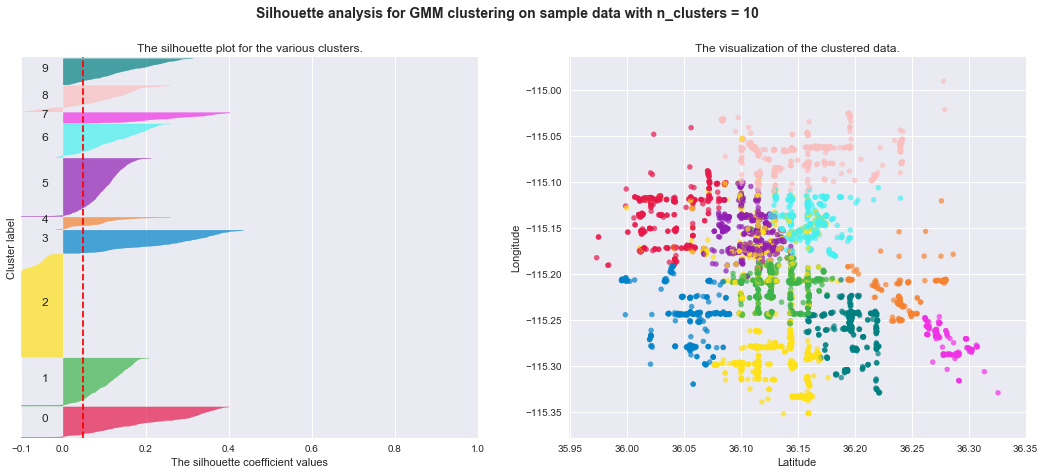

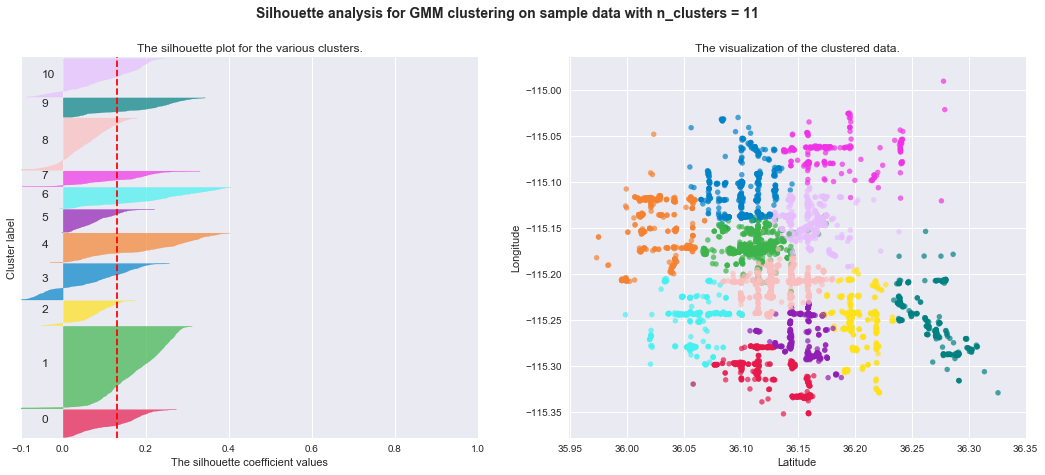

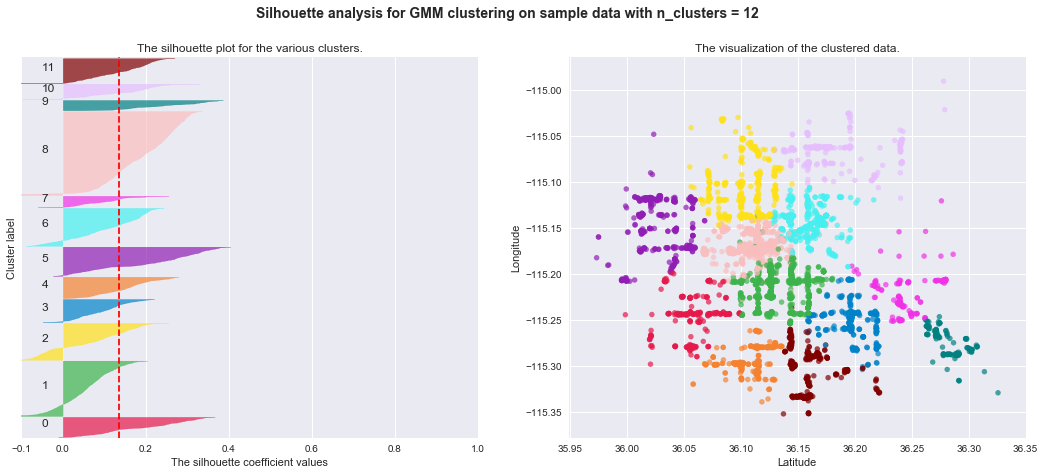

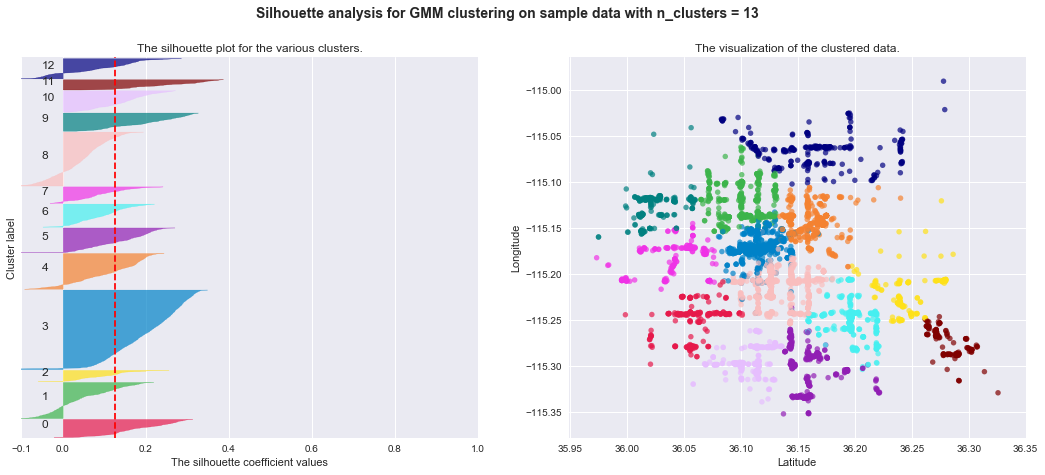

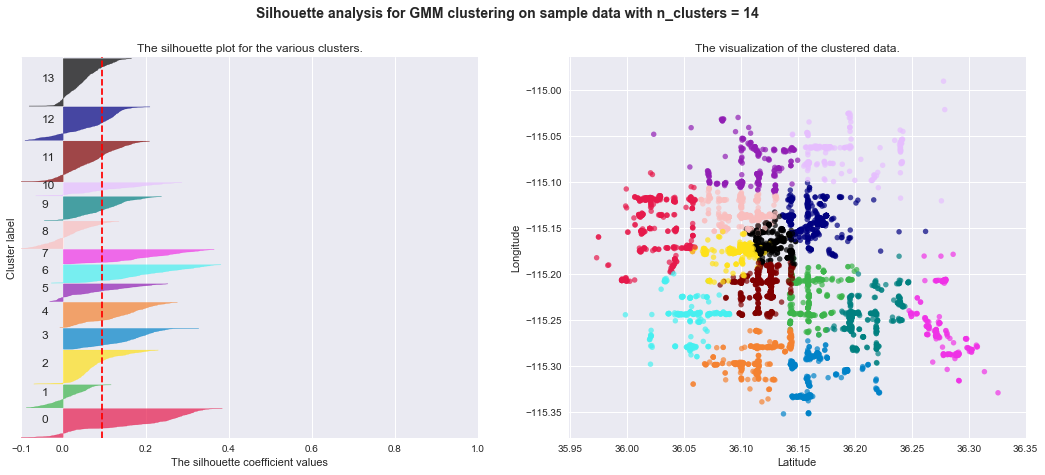

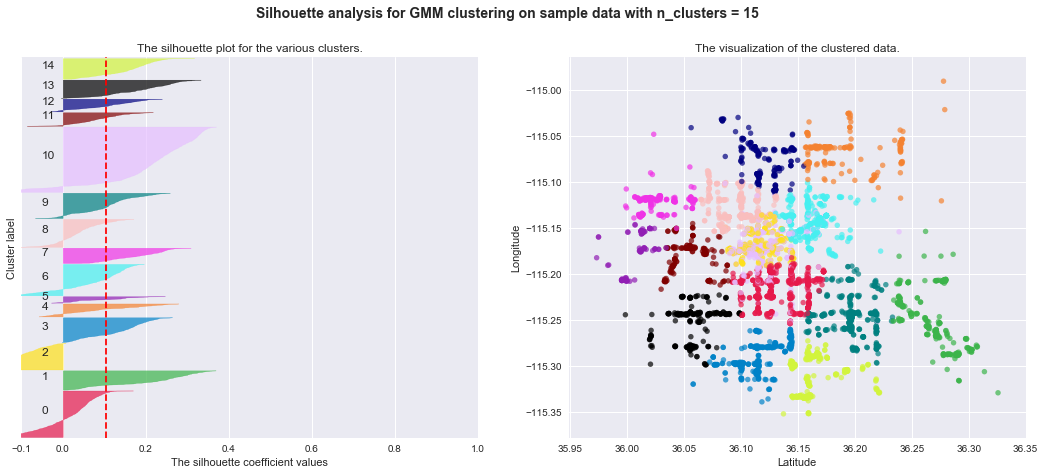

In [14]:
data_gmm = df_pca_names.copy()
data_gmm["latitude"] *= 2
data_gmm["longitude"] *= 2
silhouette_analysis(data_gmm, 10,"GMM")
silhouette_analysis(data_gmm, 11,"GMM")
silhouette_analysis(data_gmm, 12,"GMM")
silhouette_analysis(data_gmm, 13,"GMM")
silhouette_analysis(data_gmm, 14,"GMM")
silhouette_analysis(data_gmm, 15,"GMM")

For n_clusters = 10 The average silhouette_score is : 0.23087181729615872
For n_clusters = 11 The average silhouette_score is : 0.23768666307276845
For n_clusters = 12 The average silhouette_score is : 0.21408784179582285
For n_clusters = 13 The average silhouette_score is : 0.19795031806713373
For n_clusters = 14 The average silhouette_score is : 0.17403269247971323
For n_clusters = 15 The average silhouette_score is : 0.1781545091760431


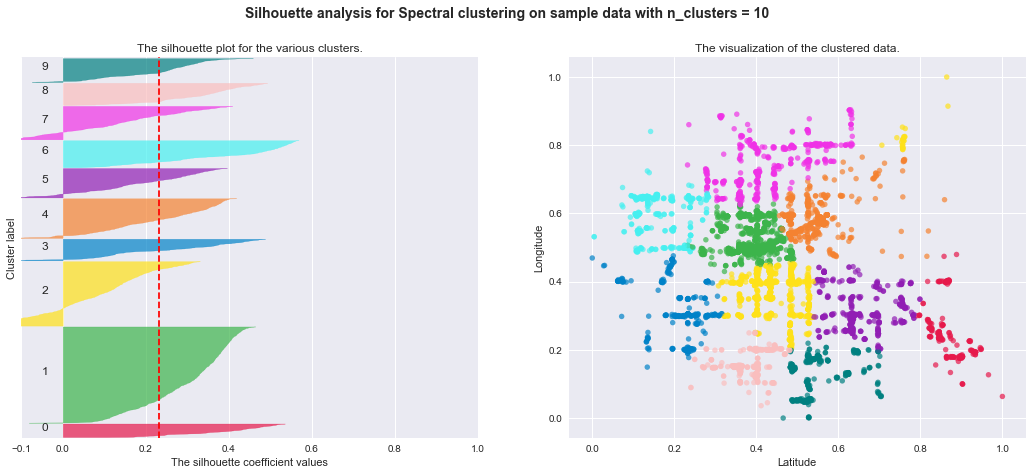

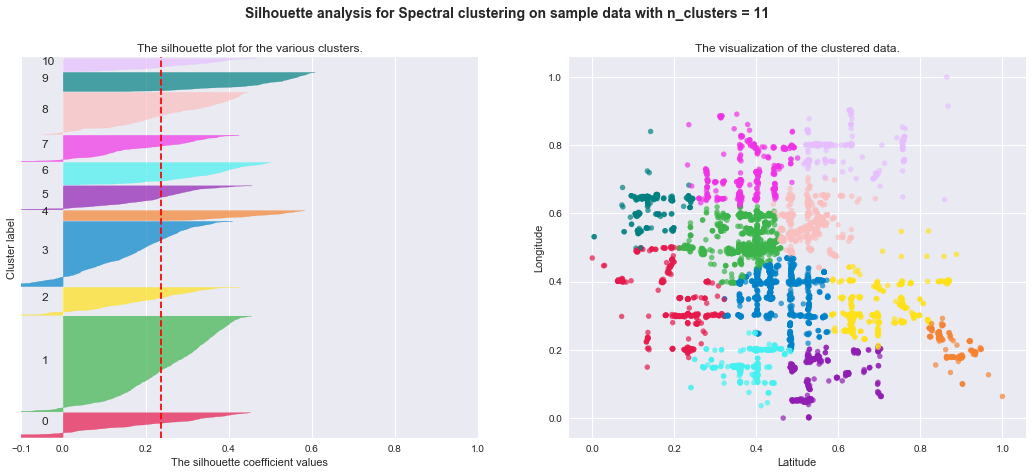

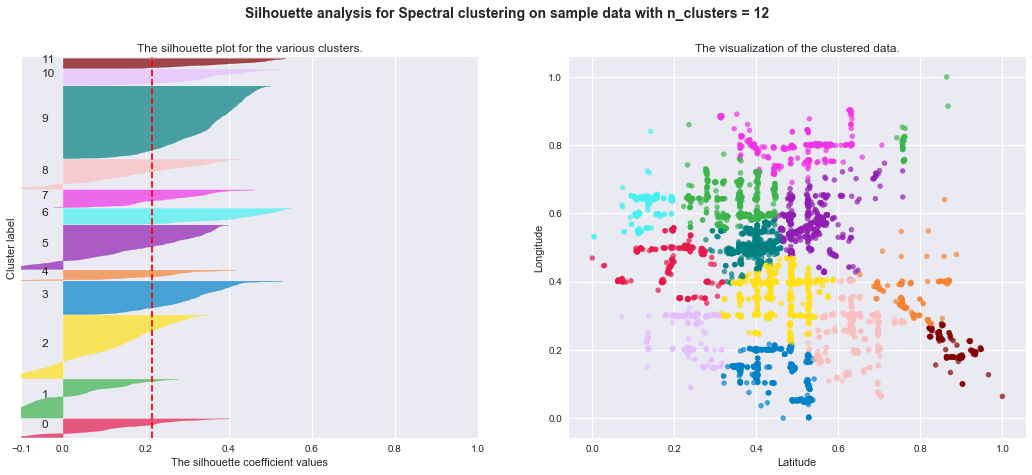

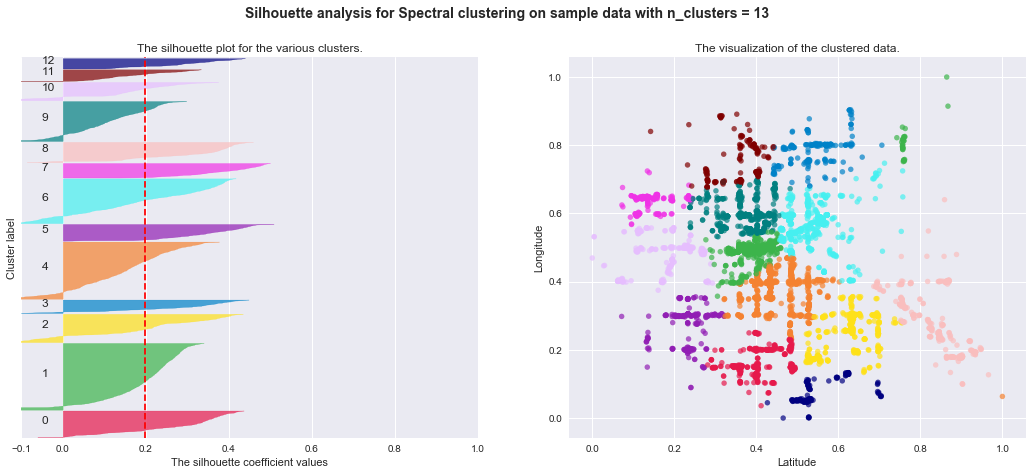

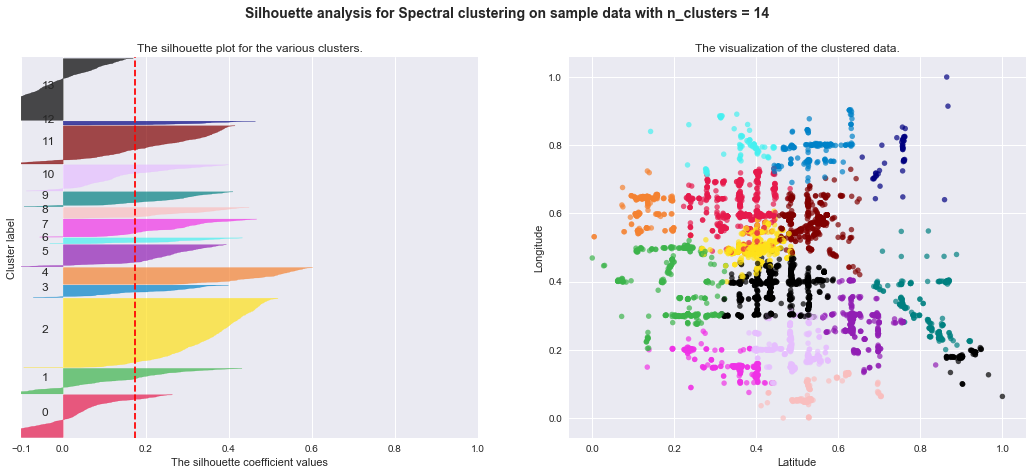

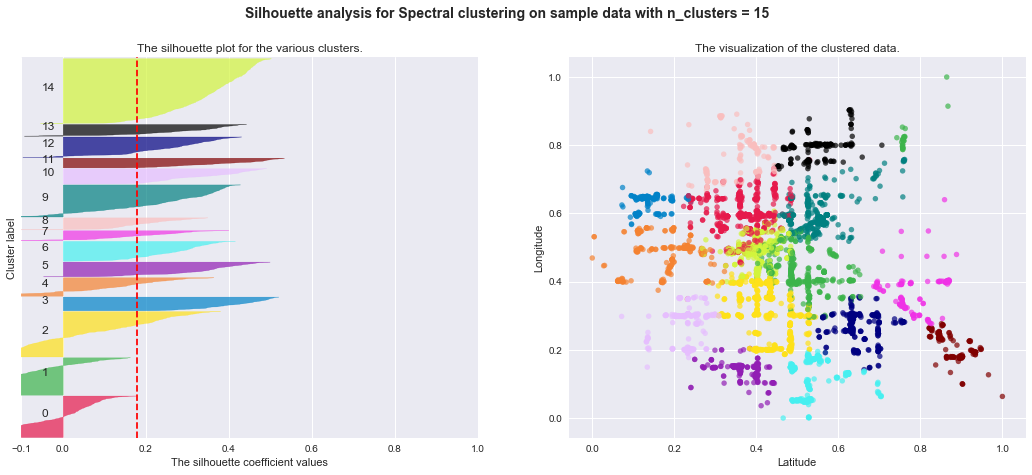

In [38]:
data_spectral = df_pca_names.copy()
data_spectral["latitude"] *= 3.5
data_spectral["longitude"] *= 3.5
silhouette_analysis(data_spectral, 10,"Spectral")
silhouette_analysis(data_spectral, 11,"Spectral")
silhouette_analysis(data_spectral, 12,"Spectral")
silhouette_analysis(data_spectral, 13,"Spectral")
silhouette_analysis(data_spectral, 14,"Spectral")
silhouette_analysis(data_spectral, 15,"Spectral")